# FIRST DOWNLOAD DATA FOLDER

lets use 5/12 as a demo

go to https://nuwildcat.sharepoint.com/:f:/r/sites/FSM-TreschLab/Shared%20Documents/General/Cortical/Data_Folders/rat-annie/5-12?csf=1&web=1&e=KLIIX5 and download

place into rat-fes/data/here

In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

from src.folder_handler import *
from src.cort_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import pickle

# the next section is loading data through Jupyter. I don't recommend this method. Skip to loading data into pickle if you want to do that way

## LOADING DATA THROUGH JUPYTER
data should be a single folder. Inside there should be a 'angles' (with angles), 'pose-3d', and 'tdt', and config.yaml folders named exactly that

In [ ]:
session512 = CortProcessor('/rat-fes/data/5-12') #insert name of your folder here

## process data
here, we crop our data, turn our raw data into rates, and we resample our angles to be same times as binned spikes

In [ ]:
rates, kins = session512.process()

### now our rates are stored under session512.data['rates'], our angles are stored under session512.data['angles'], and our coords are stored under session512.data['coords']

In [ ]:
print(session512.data['rates'][0].shape)
print(session512.data['angles'][0].shape)
print(session512.data['coords'][0].shape)

# recommended way to load data: using pickles (and process_cort.py in scripts)

in order to process data using command line, navigate to /scripts, and run ``` python3 process_cort.py 'path_to_data_folder' ```

this will generate a file in data/pickles/______ 

then you can load the pickled CortProcessor object in the following line of code

In [3]:
with open('/home/diya/Documents/rat-fes/data/pickles/rat-annie_5-12_session.pkl', 'rb') as inp: #YOUR PATH HERE
    session512 = pickle.load(inp)

In [5]:
session512.__dict__.keys() #data is the importat thing

dict_keys(['handler', 'tdt_data', 'kin_data', 'crop_list', 'data', 'gait_indices', 'avg_gait_samples'])

In [6]:
print(session512.data['rates'][0].shape)
print(session512.data['angles'][0].shape)
print(session512.data['coords'][0].shape)

(2962, 32)
(2962, 7)
(2962, 17, 3)


# pipeline processing, like getting toe height

In [6]:
toe_height = session512.process_toe_height()

In [7]:
print(session512.data['toe_height'][0].shape)

(2962,)


# and now some decoding

## angles

In [8]:
session512.decode_angles?

Signature: session512.decode_angles(X=None, Y=None)
Docstring:
takes list of rates, angles, then using a wiener filter to decode. 
if no parameters are passed, uses data['rates'] and data['angles']

returns best_h, vaf (array of all angles and all folds), test_x (the
x test set that had best performance, and test_y (the y test set that
had best formance)
File:      /mnt/c/oobootoo/rat-fes/src/cort_processor.py
Type:      method


In [9]:
h_angles, vaf_angles, test_x_angles, test_y_angles = session512.decode_angles()

In [10]:
np.average(vaf_angles, 1)

array([0.3171648 , 0.46291697, 0.15983288, 0.42454539, 0.37330029,
       0.07151469, 0.29051661])

## toe_height

In [11]:
h_toe, vaf_toe, best_x_toe, best_y_toe = session512.decode_toe_height()

[0.22420311 0.23187762 0.3987968  0.37335861 0.46173655 0.39471041
 0.4846862  0.44111594 0.49718632 0.52955933]


In [12]:
average_toe_vaf = np.average(vaf_toe)
print(average_toe_vaf)

0.4037230905992395


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
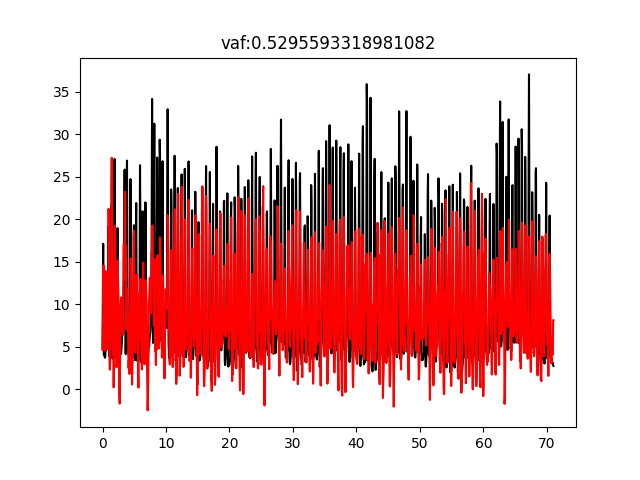

In [13]:
plot_wiener_filter_predic(best_x_toe, best_y_toe, h_toe)

# or dividing into gaits, then plotting sorted raster.

In [14]:
session512.get_gait_indices?

Signature: session512.get_gait_indices(Y=None)
Docstring:
This takes a kinematic variable, and returns indices where each peak is
found. It also returns the average number of samples between each
peaks. 

If passing in without parameter, it uses the 3rd angle measurement,
which is usually the limbfoot angle. 

This is mainly used as a starter method for other method.
Divide_into_gaits for instance takes in these indices, and divides both
the kinematics and rates into gait cycles.
File:      /mnt/c/oobootoo/rat-fes/src/cort_processor.py
Type:      method


In [15]:
gait_indices, avg_gait_samples = session512.get_gait_indices()

In [16]:
X_gait, Y_gait = session512.divide_into_gaits()

In [17]:
df = session512.neuron_tuning()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
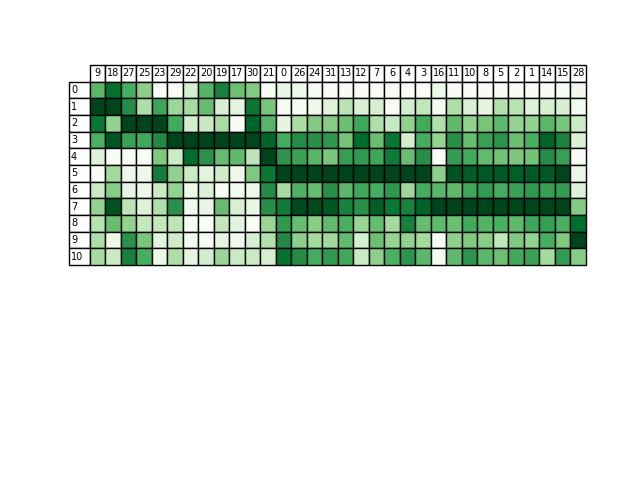

In [18]:
plot_raster(df)